In [1]:
import pandas as pd

df = pd.read_csv("Gaming-Trends-2024.csv")
df.head()

,Date,Platform,Daily Active Users (DAU),New Registrations,Session Duration (minutes),In-game Purchases ($),Social Media Mentions,Stream Viewership,Revenue ($),Top Genre,Influencer Endorsements
0,2022-04-13,PC,142204,14220,31.266635,60772.724060,7116,85079.542766,87378.407590,Action,0
1,2021-03-17,PC,132314,13231,23.314436,43499.834450,6582,64188.420576,41132.113751,Action,0
2,2019-03-09,VR,111557,11155,33.859334,52178.791314,5572,34385.665788,71787.342041,Simulation,0
3,2021-03-31,Console,132909,13290,80.580010,25085.562444,6619,43129.915707,18639.641156,RPG,0
4,2021-02-04,Mobile,130694,13069,37.270903,55277.074439,6555,69341.389827,63849.959750,Action,0


In [2]:
df.shape[0], df.shape[1]

(4989, 11)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4989 entries, 0 to 4988
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        4989 non-null   object 
 1   Platform                    4989 non-null   object 
 2   Daily Active Users (DAU)    4989 non-null   int64  
 3   New Registrations           4989 non-null   int64  
 4   Session Duration (minutes)  4989 non-null   float64
 5   In-game Purchases ($)       4989 non-null   float64
 6   Social Media Mentions       4989 non-null   int64  
 7   Stream Viewership           4989 non-null   float64
 8   Revenue ($)                 4989 non-null   float64
 9   Top Genre                   4989 non-null   object 
 10  Influencer Endorsements     4989 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 428.9+ KB


### ตัดข้อมูลของวันที่ `Revenue ($) < In-game Purchases ($)` (เป็นไปไม่ได้)

In [5]:
df = df[df['In-game Purchases ($)'] <= df['Revenue ($)']]
df.shape

(3073, 11)

# แนวเกมที่ยอดนิยมในแต่ละปี
แนวเกมใดที่ผู้เล่นติดตามและเล่นเยอะที่สุด 3 อันดับแรกในแต่ละปี
โดยให้ลำดับความสำคัญแก่ข้อมูลเหล่านี้

* <span style="color:yellow">Daliy Active Users (DAU) 40%</span><br/>
<span style="color:cyan">จำนวนผู้เล่นที่ล็อกอินเข้าเล่นทุกวันเป็นตัวชี้วัดหลักของความนิยมของแนวเกม ยิ่งมีผู้เล่นเยอะ</span><br/> 
<span style="color:cyan">หมายถึงแนวเกมนั้นได้รับความสนใจสูง และอาจมี fanbase ที่เหนียวแน่น</span><br/>

* <span style="color:yellow">Stream Viewership 25%</span><br/>
<span style="color:cyan">แม้บางเกมอาจมีผู้เล่นไม่มาก แต่มีคนดูสตรีมเยอะมาก (เช่น เกมหมากรุก, Chess)</span><br/>
<span style="color:cyan">ซึ่งสะท้อนว่าแนวเกมนั้นมีความน่าสนใจในการรับชมและติดตามผ่าน platform ต่างๆ เช่น Twitch และ YouTube</span><br/>

* <span style="color:yellow">Revenue ($) 15%</span><br/>
<span style="color:cyan">การทำรายได้สูงแสดงถึงความสามารถของแนวเกมในการสร้างรายรับจากผู้เล่น ไม่ว่าจะผ่านการขายเกม</span><br/>
<span style="color:cyan">Merch หรือ Battlepass แนวเกมที่สร้างรายได้ดีมักจะได้รับการสนับสนุนและพัฒนาอย่างต่อเนื่อง</span><br/>

* <span style="color:yellow">In-game Purchases ($) 10%</span><br/>
<span style="color:cyan">จำนวนเงินที่ผู้เล่นใช้จ่ายในเกมเป็นตัวชี้วัด engagement ยิ่งแนวเกมกระตุ้นให้ผู้เล่นใช้จ่ายมาก</span><br/>
<span style="color:cyan">หมายถึงมีความสามารถดึงดูดให้ผู้เล่นลงทุนกับ item หรือ content ในเกม</span><br/>

* <span style="color:yellow">Session Duration (minutes) 10%</span><br/>
<span style="color:cyan">ระยะเวลาที่ผู้เล่นใช้ในเกมสะท้อนถึงความดึงดูดของแนวเกม เกมที่มีผู้เล่นเล่นนานบ่งบอกว่าแนวเกมนั้น</span><br/>
<span style="color:cyan">สามารถรักษาความสนใจและสร้างประสบการณ์ที่ทำให้ผู้เล่นอยากเล่นต่อ</span><br/>

In [ ]:
#แยกปีออก
df["Date"] = pd.to_datetime(df["Date"])
df["Year"] = df["Date"].dt.year

# จัดกลุ่มตามปีและแนวเกม แล้วหาค่าเฉลี่ยของ DAU, Viewership, Revenue, Purchases, และ Session Duration
genre_stats = df.groupby(["Year", "Top Genre"]).agg({
    "Daily Active Users (DAU)": "mean",
    "Stream Viewership": "mean",
    "Revenue ($)": "mean",
    "In-game Purchases ($)": "mean",
    "Session Duration (minutes)": "mean"
}).reset_index()

# คำนวณ popularity score โดยให้ค่าน้ำหนักแต่ละปัจจัยตามที่กล่าวไว้ข้างต้น
genre_stats["Popularity Score"] = (
    (genre_stats["Daily Active Users (DAU)"] * 0.4) +
    (genre_stats["Stream Viewership"] * 0.25) +
    (genre_stats["Revenue ($)"] * 0.15) +
    (genre_stats["In-game Purchases ($)"] * 0.1) +
    (genre_stats["Session Duration (minutes)"] * 0.1)
)

# ดูว่าแนวเกมใดได้คะแนนความ popular มากที่สุดตามที่คำนวนเอาไว้
top_genre_each_year = genre_stats.loc[genre_stats.groupby("Year")["Popularity Score"].idxmax()]

# แสดงผลลัพธ์แนวเกมยอดนิยมในแต่ละปี
pd.DataFrame(top_genre_each_year[["Year", "Top Genre", "Popularity Score"]])


,Year,Top Genre,Popularity Score
3,2010,RPG,82125.422703
8,2011,RPG,80411.705907
14,2012,Simulation,85034.349104
17,2013,FPS,79014.948999
21,2014,Adventure,77826.639688
29,2015,Simulation,82289.417296
34,2016,Simulation,76556.252884
39,2017,Simulation,79588.966561
40,2018,Action,77452.652349
48,2019,RPG,78622.057902


### แนวเกมยอดนิยม 3 อันดับแรกของแต่ละปี

In [ ]:
# เรียงข้อมูลของแต่ละปี โดยเรียงปี และ Popularity Score ของเกมแต่ละแนวก่อน
top_3_genres_each_year = genre_stats.sort_values(by=["Year", "Popularity Score"], ascending=[True, False])

# เก็บเฉพาะ 3 อันดับแรกของแต่ละปี
top_3_genres_each_year = top_3_genres_each_year.groupby("Year").head(3).reset_index(drop=True)

# เพิ่ม column Rank เพื่อบอกอันดับ
top_3_genres_each_year["Rank"] = top_3_genres_each_year.groupby("Year")["Popularity Score"].rank(
    method="first", ascending=False
)

# เรียงลำดับข้อมูลตามปีและอันดับ
top_3_genres_each_year = top_3_genres_each_year.sort_values(by=["Year", "Rank"])

# Pivot ข้อมูลให้อยู่ในรูป Year เดียว แต่แยกเป็น Rank 1, 2, 3
res_pivot = top_3_genres_each_year.pivot(index="Year", columns="Rank", values="Top Genre")

# แก้ไขชื่อ column เป็น Rank {x} เพื่อให้ดูง่าย
res_pivot.columns = [f"Rank {int(col)}" for col in res_pivot.columns]

# รีเซ็ต index เพื่อให้ Year กลับมาเป็นคอลัมน์ปกติ
res_pivot.reset_index(inplace=True)
pd.DataFrame(res_pivot)

,Year,Rank 1,Rank 2,Rank 3
0,2010,RPG,FPS,Adventure
1,2011,RPG,FPS,Action
2,2012,Simulation,FPS,RPG
3,2013,FPS,Action,Adventure
4,2014,Adventure,Simulation,FPS
5,2015,Simulation,Adventure,FPS
6,2016,Simulation,Adventure,RPG
7,2017,Simulation,Adventure,FPS
8,2018,Action,Adventure,FPS
9,2019,RPG,Simulation,FPS


# วิเคราะห์ดูแนวโน้มของแนวเกมยอดนิยมในแต่ละปี

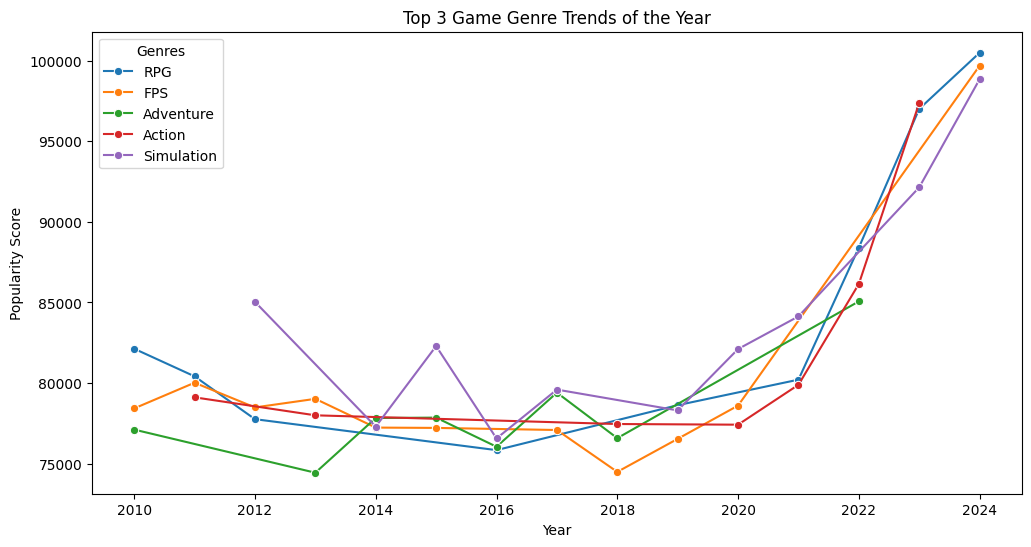

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.lineplot(data=top_3_genres_each_year, 
             x="Year", 
             y="Popularity Score", 
             hue="Top Genre", marker="o")
plt.title("Top 3 Game Genre Trends of the Year")
plt.xlabel("Year")
plt.ylabel("Popularity Score")
plt.legend(title="Genres")
plt.show()

## ข้อสรุปที่ได้จากการวิเคราะห์นี้

1️⃣ แนวเกม RPG และ Simulation มีความนิยมต่อเนื่อง
* จากตาราง RPG และ Simulation ปรากฏบ่อยใน Rank 1, 2, และ 3 เกือบทุกปี
* จากกราฟ RPG และ Simulation มี Popularity Score ที่เพิ่มขึ้นอย่างชัดเจนหลังปี 2020

2️⃣ ความนิยมของแนว FPS และ Action เพิ่มขึ้นอย่างมากหลังปี 2020
* จากกราฟ FPS และ Action มีแนวโน้มเติบโตสูงขึ้นอย่างชัดเจนในช่วงปี 2020 - 2024
* อาจเป็นผลจากเกมที่มีการแข่งขันสูงขึ้น เช่น Battle Royale และ Shooter Games ที่เน้น eSports

3️⃣ อุตสาหกรรมเกมโดยรวมเติบโตขึ้นในช่วงปี 2020-2024
* กราฟแสดงให้เห็นว่า Popularity Score ของทุกแนวเกมเพิ่มขึ้นหลังปี 2020
* อาจเป็นเพราะ การเติบโตของตลาดเกม, การสตรีมเกม, และพฤติกรรมผู้เล่นที่เปลี่ยนแปลงหลังยุค COVID-19